In [6]:
import pandas as pd
import numpy as np
import csv

In [7]:
FB_data = pd.read_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\FB.csv')
FB_data

,Date,Open,High,Low,Close,Volume
0,04-Jan-16,104.44,104.44,99.75,102.31,345674
1,05-Jan-16,102.33,103.71,101.41,102.80,215313
2,06-Jan-16,102.02,103.77,100.75,103.17,234525
3,07-Jan-16,102.02,102.02,97.30,97.65,419638
4,08-Jan-16,99.00,100.50,97.03,97.18,325973
5,11-Jan-16,97.80,98.79,95.39,97.65,279704
6,12-Jan-16,97.51,99.96,97.51,99.67,263965
7,13-Jan-16,100.10,100.58,95.01,95.08,312869
8,14-Jan-16,95.10,98.87,92.45,98.12,440052
9,15-Jan-16,97.17,97.17,93.52,94.75,424731


In [8]:
FB_series = FB_data[['Date','Close']]

In [9]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = Series.from_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\FB_series.csv', header=0)
# prepare situation
X = series.values
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
spread_high = list()
spread_low = list()
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=98.838000, expected=95.200000
predicted=98.127000, expected=94.940000
predicted=97.341000, expected=94.400000
predicted=96.464000, expected=98.250000
predicted=96.524000, expected=96.820000
predicted=96.488000, expected=97.350000
predicted=96.458000, expected=105.850000
predicted=97.076000, expected=107.740000
predicted=98.342000, expected=112.150000
predicted=99.745000, expected=114.900000
predicted=101.760000, expected=114.590000
predicted=103.699000, expected=112.610000
predicted=105.466000, expected=109.300000
predicted=106.956000, expected=103.510000
predicted=107.482000, expected=99.000000
predicted=107.700000, expected=100.030000
predicted=107.968000, expected=101.420000
predicted=107.525000, expected=102.220000
predicted=106.973000, expected=101.870000
predicted=105.945000, expected=101.540000
predicted=104.609000, expected=105.670000
predicted=103.717000, expected=103.650000
predicted=102.821000, expected=104.590000
predicted=102.350000, expected=106.820000
predicted

C:\Users\TEJESH\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [10]:
std_dev = np.std(FB_data['Close'])
print("std  : ", std_dev)
spread = std_dev*0.05
print(spread)
std_high = [spread + predictions[i] for i in range(len(predictions))]
std_low = [predictions[i] - spread for i in range(len(predictions))]

std  :  26.375654121778087
1.3187827060889044


Test RMSE: 4.069


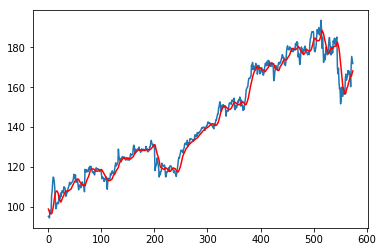

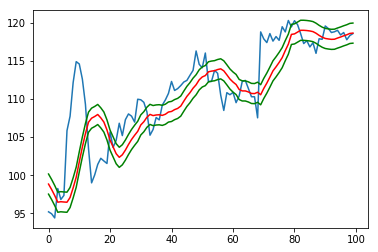

In [11]:
error = mean_squared_error(test, predictions)
rootmse = np.sqrt(error)
print('Test RMSE: %.3f' % rootmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.plot(std_high[0:100], color = 'green')
pyplot.plot(std_low[0:100], color = 'green')
pyplot.show()
